# Getting started with PhenoScore
In this notebook, we will run some basic analyses using PhenoScore to demonstrate how it works.
First, lets get started and import the installed package (for instructions, please see the README.md)

In [1]:
from phenoscore.phenoscorer import PhenoScorer
import os

2023-02-22 13:31:03,328 - phenopy - INFO - checking if config file exists: C:\ProgramData\Anaconda3\envs\PhenoScore\.phenopy
2023-02-22 13:31:03,331 - phenopy - INFO - phenopy 0.5.2
2023-02-22 13:31:03,332 - phenopy - INFO - Using configuration file: C:\ProgramData\Anaconda3\envs\PhenoScore\.phenopy\phenopy.ini


Then, decided on what mode you want to run PhenoScore in: HPO-only, facial-features only, or using both. 
For now, we will do both and intialize PhenoScore with the standard options. PhenoScore will autodetect any GPUs that are available and if there are none, revert to CPU mode. If there are no GPUs detected, while there should be, please double check your installation and confirm cuDNN is installed in this environment as well.

In [2]:
mode = 'both'
N_LIME = 1 #this is purely for speed during testing purposes: for same results as in paper, set N_LIME=5

phenoscorer = PhenoScorer(gene_name='SATB1', 
                          mode=mode,
                          method_hpo_similarity='Resnik',
                          method_summ_hpo_similarities='BMA')

Using CPU, since no GPUs are found!


Now that PhenoScore is ready, let's load data. In this case, let's take a look at the SATB1 subgroup analyses: the data is included in the package.

In [3]:
X, y, img_paths, df_data = phenoscorer.load_data_from_excel(os.path.join('../', 'phenoscore', 'sample_data','satb1_data.xlsx'))
print('Data loaded!')

Data loaded!


Now that the data is loaded, we can run the permutation test, to see if we can distinguish the two groups.

In [4]:
phenoscorer.permutation_test(X, y, bootstraps=1000)
print("Brier:" + str(phenoscorer.permutation_test_brier))
print("AUC:" + str(phenoscorer.permutation_test_auc))
print("P value:" + str(phenoscorer.permutation_test_p_value))

100%|██████████| 1001/1001 [34:18<00:00,  2.06s/it]


Brier:0.20502073859188258
AUC:0.765625
P value:0.045795575771021654


The result is significant! So PhenoScore is able to detect a phenotypic difference between the two groups. Of course, we would like to know what the clinical difference is. So let's investigate this, using LIME. 

Starting cross validation procedure to compare using facial/HPO data only with PhenoScore.
Finished cross validation and evaluation of model scores. Now starting LIME for the top 1 predictions to generate heatmaps and visualise phenotypic differences.


100%|██████████| 1/1 [27:09<00:00, 1629.13s/it]


Figure saved as lime_figure.pdf


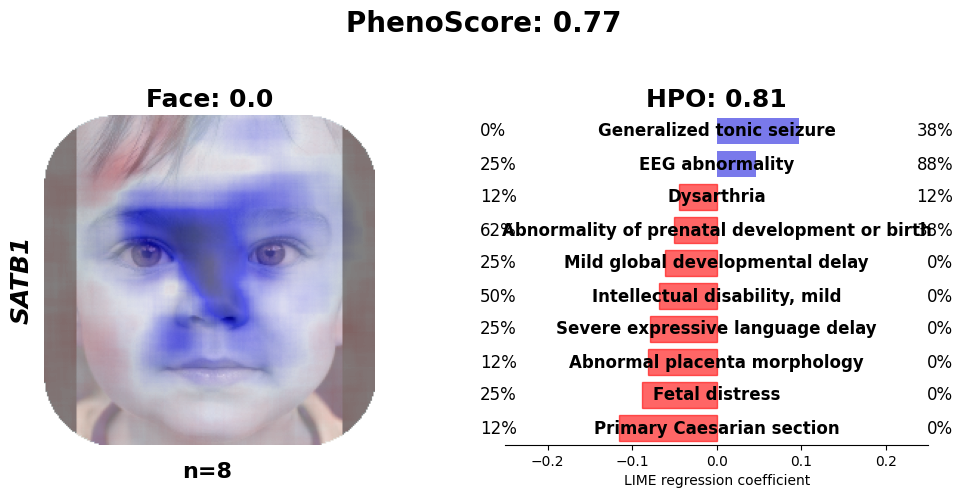

LIME images generated!


In [5]:
phenoscorer.get_lime(X, y, img_paths, n_lime=N_LIME)
phenoscorer.gen_lime_and_results_figure(bg_image=os.path.join('../', 'phenoscore', 'sample_data','background_image.jpg'),
                                        df_data=df_data, filename='lime_figure.pdf')
print("LIME images generated!")

Finally, we can generate a VUS prediction for a SATB1 individual (as if it where an individual with a VUS, of course in this case, purely for demonstrational purposes). Because of the demonstrational purpose and speed, we choose ``lime_iter=10``(normally we would do ``lime_iter=100`` to obtain a higher resolution heatmap).

Predictive score between 0 (control) and 1 (syndrome): [0.24394575]
Figure saved as individual_lime_explanations.pdf


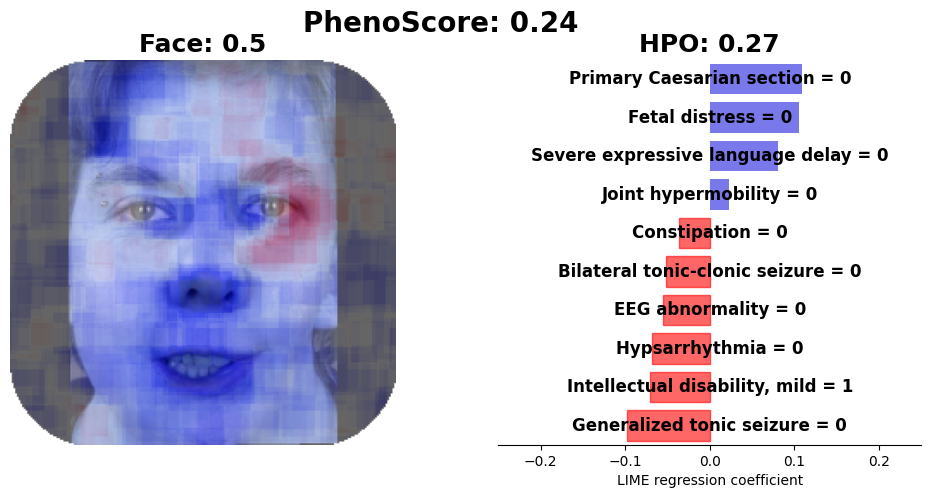

In [6]:
phenoscorer.predict_new_sample(X, y, img_paths[0], X[0,-1], lime_iter=10)
print("Predictive score between 0 (control) and 1 (syndrome): " + str(phenoscorer.vus_results[0]))
phenoscorer.gen_vus_figure(filename='individual_lime_explanations.pdf')

We can do the same procedures for HPO-only mode as well, simply by just changing that parameter.

Using CPU, since no GPUs are found!
Data loaded!


100%|██████████| 1001/1001 [25:56<00:00,  1.56s/it] 


Brier:0.20404733159184807
AUC:0.8125
P value:0.042879219496799834
Starting cross validation procedure to compare using facial/HPO data only with PhenoScore.
Finished cross validation and evaluation of model scores. Now starting LIME for the top 1 predictions to generate heatmaps and visualise phenotypic differences.


100%|██████████| 1/1 [00:25<00:00, 25.65s/it]


Figure saved as lime_figure.pdf


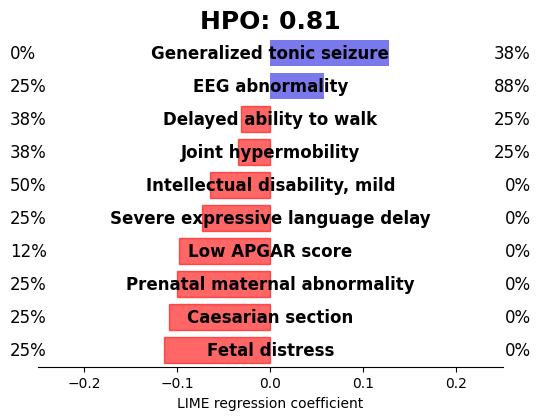

LIME images generated!


In [7]:
mode = 'hpo'
phenoscorer = PhenoScorer(gene_name='SATB1', 
                          mode=mode,
                          method_hpo_similarity='Resnik',
                          method_summ_hpo_similarities='BMA')
X, y, img_paths, df_data = phenoscorer.load_data_from_excel(os.path.join('../', 'phenoscore', 'sample_data','satb1_data.xlsx'))
print('Data loaded!')
phenoscorer.permutation_test(X, y, bootstraps=1000)
print("Brier:" + str(phenoscorer.permutation_test_brier))
print("AUC:" + str(phenoscorer.permutation_test_auc))
print("P value:" + str(phenoscorer.permutation_test_p_value))
phenoscorer.get_lime(X, y, img_paths, n_lime=N_LIME)
phenoscorer.gen_lime_and_results_figure(bg_image=os.path.join('../', 'phenoscore', 'sample_data','background_image.jpg'),
                                        df_data=df_data, filename='lime_figure.pdf')
print("LIME images generated!")

And similar when only using facial images (or when these are the only ones available):

Using CPU, since no GPUs are found!
Data loaded!


100%|██████████| 1001/1001 [27:01<00:00,  1.62s/it]


Brier:0.30971710444279343
AUC:0.0
P value:0.9045842264355243
Starting cross validation procedure to compare using facial/HPO data only with PhenoScore.
Finished cross validation and evaluation of model scores. Now starting LIME for the top 1 predictions to generate heatmaps and visualise phenotypic differences.


100%|██████████| 1/1 [24:40<00:00, 1480.77s/it]


Figure saved as lime_figure.pdf


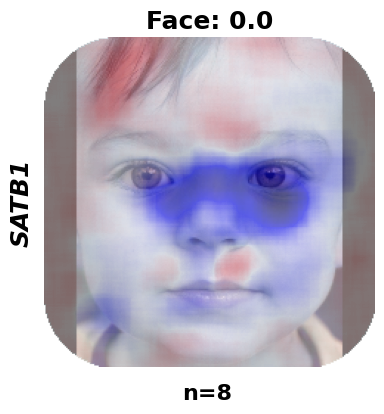

LIME images generated!


In [8]:
mode = 'face'
phenoscorer = PhenoScorer(gene_name='SATB1', 
                          mode=mode,
                          method_hpo_similarity='Resnik',
                          method_summ_hpo_similarities='BMA')
X, y, img_paths, df_data = phenoscorer.load_data_from_excel(os.path.join('../', 'phenoscore', 'sample_data','satb1_data.xlsx'))
print('Data loaded!')
phenoscorer.permutation_test(X, y, bootstraps=1000)
print("Brier:" + str(phenoscorer.permutation_test_brier))
print("AUC:" + str(phenoscorer.permutation_test_auc))
print("P value:" + str(phenoscorer.permutation_test_p_value))
phenoscorer.get_lime(X, y, img_paths, n_lime=N_LIME)
phenoscorer.gen_lime_and_results_figure(bg_image=os.path.join('../', 'phenoscore', 'sample_data','background_image.jpg'),
                                        df_data=df_data, filename='lime_figure.pdf')
print("LIME images generated!")